# 一起来打怪之 Credit Scoring 练习

-------
## >>>说明：
### 1. 答题步骤：
- 回答问题**请保留每一步**操作过程，请不要仅仅给出最后答案
- 请养成代码注释的好习惯

### 2. 解题思路：
- 为方便大家准确理解题目，在习题实战中有所收获，本文档提供了解题思路提示
- 解题思路**仅供参考**，鼓励原创解题方法
- 为督促同学们自己思考，解题思路内容设置为**注释**，请注意查看

### 3. 所用数据：
- 问题使用了多个数据库，请注意导入每个数据库后都先**查看和了解数据的基本性质**，后面的问题不再一一提醒

--------
## 操作题

### 信用卡欺诈项目

 #### 前期数据导入,预览及处理(此部分勿修改，涉及的数据文件无需复制移动)

In [216]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import zipfile
with zipfile.ZipFile('KaggleCredit2.csv.zip', 'r') as z:
    f = z.open('KaggleCredit2.csv')
    data = pd.read_csv(f, index_col=0)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


In [217]:
# 检查数据维度
data.shape

(112915, 11)

In [218]:
# 查看数据缺失值情况
data.isnull().sum(axis=0)

SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                     4267
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      4267
dtype: int64

In [219]:
# 清除缺失值
data.dropna(inplace=True)
data.shapey = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)

C:\Users\Henrik\AppData\Local\Temp\ipykernel_27632\2980780030.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.shapey = data['SeriousDlqin2yrs']


In [220]:
# 取出对应的X和y
y = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)
# 查看平均的欺诈率
y.mean()

0.06742876076872101

### 以下为操作题

#### 1.把数据切分成训练集和测试集

In [221]:
# 提示：查看train_test_split函数
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0) #测试、训练3:7分

In [222]:
# 通过SeriousDlqin2yrs字段查看正负样本分布情况
# 提示：value_counts


# 绘制两种类别的柱状图
# 提示：dataframe可以直接plot(kind='bar')



In [223]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [224]:
temp = data['SeriousDlqin2yrs'].value_counts()
temp

SeriousDlqin2yrs
0    101322
1      7326
Name: count, dtype: int64

Text(0, 0.5, 'Number')

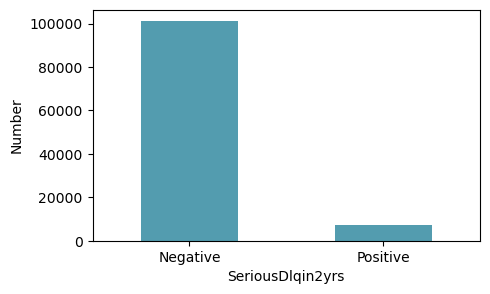

In [225]:
fig, ax = plt.subplots(figsize = (5, 3))
temp.plot(kind='bar', color = '#539caf')
plt.xticks([0, 1], rotation = 0)
ax.set_xticklabels([ 'Negative', 'Positive'])
ax.set_ylabel('Number', fontsize = 10)

#### 2.数据预处理之离散化

In [226]:
# 请对年龄按照3岁一个区间进行离散化
# 提示：可以先计算出分桶边界，再基于pandas的cut函数进行离散化(分箱、分桶)
min_age = data['age'].min()
max_age = data['age'].max()
s = max_age%3

bin = list(range(int(min_age), int(max_age+3-s+1), 3)) #构建bins的区间序列，因为range左闭右开，右侧最大值取值需加一

#基于cut函数进行离散化
X_train['age'] = pd.cut(X_train['age'], bins=bin)
X_test['age'] = pd.cut(X_test['age'], bins=bin)
#X_train['age'].value_counts().sort_index()
#X_test['age'].value_counts().sort_index()
X_train.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
64329,0.116959,"(24, 27]",0.0,0.326024,3100.0,7.0,0.0,0.0,0.0,1.0
70087,0.050666,"(81, 84]",0.0,0.177182,10000.0,9.0,0.0,1.0,0.0,0.0
77642,0.038865,"(69, 72]",0.0,0.016600,5722.0,7.0,0.0,0.0,0.0,0.0
6017,0.023513,"(54, 57]",0.0,0.266260,10500.0,8.0,0.0,2.0,0.0,3.0
106521,0.039350,"(81, 84]",0.0,0.195179,1700.0,3.0,0.0,0.0,0.0,0.0


#### 3.数据预处理之独热向量编码

In [227]:
# 请对上述分箱后的年龄段进行独热向量编码
# 提示：使用pandas的get_dummies完成
X_train = pd.get_dummies(X_train, columns=['age']) #调用get_dummies函数，其余参数保持默认
X_test = pd.get_dummies(X_test, columns=['age'])
X_train.head()

,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,"age_(0, 3]","age_(3, 6]","age_(6, 9]","age_(9, 12]","age_(12, 15]","age_(15, 18]","age_(18, 21]","age_(21, 24]","age_(24, 27]","age_(27, 30]","age_(30, 33]","age_(33, 36]","age_(36, 39]","age_(39, 42]","age_(42, 45]","age_(45, 48]","age_(48, 51]","age_(51, 54]","age_(54, 57]","age_(57, 60]","age_(60, 63]","age_(63, 66]","age_(66, 69]","age_(69, 72]","age_(72, 75]","age_(75, 78]","age_(78, 81]","age_(81, 84]","age_(84, 87]","age_(87, 90]","age_(90, 93]","age_(93, 96]","age_(96, 99]","age_(99, 102]","age_(102, 105]"
64329,0.116959,0.0,0.326024,3100.0,7.0,0.0,0.0,0.0,1.0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
70087,0.050666,0.0,0.177182,10000.0,9.0,0.0,1.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
77642,0.038865,0.0,0.016600,5722.0,7.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
6017,0.023513,0.0,0.266260,10500.0,8.0,0.0,2.0,0.0,3.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
106521,0.039350,0.0,0.195179,1700.0,3.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


#### 4.数据预处理之幅度缩放

In [228]:
# 请对连续值特征进行幅度缩放
# 提示：可以使用StandardScaler等幅度缩放器进行处理
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

#### 5.使用logistic regression建模，并且输出一下系数，分析重要度。   

In [229]:
# 提示：fit建模，建完模之后可以取出coef属性
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=500.0, max_iter=500, random_state=0, solver='liblinear') #solver需设定为liblinear， 因为后续步骤需使用L1正则化
lr.fit(X_train_std, y_train)
lr.coef_


array([[-1.42710751e-02,  1.72093793e+00,  3.11176558e-01,
        -1.26555205e-01, -9.46328036e-02,  1.68143960e+00,
        -1.95254802e-01, -3.22840446e+00,  1.10601314e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.51159632e-03,  1.82532563e-01,  2.71411010e-01,
         3.32747072e-01,  3.20208928e-01,  3.26464372e-01,
         2.96112998e-01,  3.40518351e-01,  3.16096852e-01,
         3.36955864e-01,  3.25010513e-01,  3.13865480e-01,
         2.50159515e-01,  2.35483577e-01,  1.94703297e-01,
         1.24516989e-01,  5.52214021e-02,  1.06859140e-01,
         6.21671889e-02,  4.38439731e-02,  2.98176691e-02,
         5.51696306e-02,  3.37363450e-02,  5.72558040e-02,
         3.11615542e-02, -9.37002405e-02,  2.28989617e-02,
        -2.43202691e-02, -1.72814740e-02]])

#### 6.使用网格搜索交叉验证进行调参
调整penalty和C参数，其中penalty候选为"l1"和"l2"，C的候选为[1,10,100,500]

In [231]:
# 提示：先按照上面要求准备好网格字典，再使用GridSearchCV进行调参
from sklearn.model_selection import GridSearchCV
grid = {'penalty':['l1', 'l2'],
        'C':[1, 10, 100, 500]}

grid_search = GridSearchCV(lr, grid, cv=5) #报错 Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty，需要更改lr模型
grid_search.fit(X_train_std, y_train)


GridSearchCV(cv=5,
             estimator=LogisticRegression(C=500.0, max_iter=500, random_state=0,
                                          solver='liblinear'),
             param_grid={'C': [1, 10, 100, 500], 'penalty': ['l1', 'l2']})

In [233]:
# 输出最好的超参数
# 输出最好的模型
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)


{'C': 1, 'penalty': 'l1'}
0.9331913221905788
LogisticRegression(C=1, max_iter=500, penalty='l1', random_state=0,
                   solver='liblinear')


#### 7.在测试集上进行预测，计算 查准率/查全率/auc/混淆矩阵/f1值 等测试指标

In [421]:
# 提示：在测试集上预测可以使用predict
# 提示：各种指标可以在sklearn.metrics中查到各种评估指标，分别是accuracy_score、recall_score、auc、confusion_matrix、f1_score
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, f1_score
model = grid_search.best_estimator_
y_pred = model.predict(X_test_std)

ac_score = accuracy_score(y_test, y_pred)
rc_score = recall_score(y_test, y_pred)
fone_score = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("accuracy: ", ac_score)
print("recall: ", rc_score)
print("f1_score: ", fone_score)
print("conf_matrix: \n", conf_matrix)


accuracy:  0.9337321675103544
recall:  0.04467987102717642
f1_score:  0.08241291418861513
conf_matrix: 
 [[30338    86]
 [ 2074    97]]


#### 8.更多优化
银行通常会有更严格的要求，因为欺诈带来的后果通常比较严重，一般我们会调整模型的标准。   

比如在logistic regression当中，一般我们的概率判定边界为0.5，但是我们可以把阈值设定低一些，来提高模型的“敏感度”   
试试看把阈值设定为0.3，再看看这个时候的混淆矩阵等评估指标。

In [249]:
# 提示：thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# 根据predict_proba的结果和threshold的比较确定结果，再评估各种结果指标

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in range(len(thresholds)):
    y_pred_pro = np.where(lr.predict_proba(X_test_std)[:,1] > thresholds[i], 1, 0)
    print('thresholds = ', thresholds[i])
    print('accuracy_score: %.4f' %accuracy_score(y_test, y_pred_pro))
    print('recall_score: %.4f' %recall_score(y_test, y_pred_pro))
    print('f1_score: %.4f' %f1_score(y_test, y_pred_pro))
    print('confusion_matrix: \n', confusion_matrix(y_test, y_pred_pro))
    print('')

thresholds =  0.1
accuracy_score: 0.8474
recall_score: 0.4279
f1_score: 0.2719
confusion_matrix: 
 [[26691  3733]
 [ 1242   929]]

thresholds =  0.2
accuracy_score: 0.9264
recall_score: 0.1930
f1_score: 0.2590
confusion_matrix: 
 [[29778   646]
 [ 1752   419]]

thresholds =  0.3
accuracy_score: 0.9329
recall_score: 0.1138
f1_score: 0.1843
confusion_matrix: 
 [[30162   262]
 [ 1924   247]]

thresholds =  0.4
accuracy_score: 0.9339
recall_score: 0.0709
f1_score: 0.1251
confusion_matrix: 
 [[30286   138]
 [ 2017   154]]

thresholds =  0.5
accuracy_score: 0.9337
recall_score: 0.0442
f1_score: 0.0816
confusion_matrix: 
 [[30338    86]
 [ 2075    96]]

thresholds =  0.6
accuracy_score: 0.9336
recall_score: 0.0290
f1_score: 0.0550
confusion_matrix: 
 [[30369    55]
 [ 2108    63]]

thresholds =  0.7
accuracy_score: 0.9337
recall_score: 0.0207
f1_score: 0.0400
confusion_matrix: 
 [[30389    35]
 [ 2126    45]]

thresholds =  0.8
accuracy_score: 0.9335
recall_score: 0.0124
f1_score: 0.0243
conf

#### 9.尝试对不同特征的重要度进行排序，通过特征选择的方式，对特征进行筛选。并重新建模，观察此时的模型准确率等评估指标。

In [413]:
# 可以根据逻辑回归的系数绝对值大小进行排序，也可以基于树模型的特征重要度进行排序
# 特征选择可以使用RFE或者selectFromModel
from sklearn.feature_selection import SelectFromModel
#参考一个博客：https://blog.csdn.net/LuohenYJ/article/details/107239105

coefficient_abs = abs(lr.coef_[0])
df = pd.DataFrame({'feature':list(X_train), 'coefficient':coefficient_abs}) #构造特征和其在逻辑回归中系数绝对值的对应关系
df.sort_values(by='coefficient', ascending=False, inplace=True) #根据系数绝对值进行排序
#df['feature'].iloc[0]

#发现能自动对特征进行筛选，进行如下尝试

lr_pro = LogisticRegression(C=1, max_iter=500, penalty='l1', random_state=0, solver='liblinear') #根据之前步骤中最优超参数构建一个新的逻辑回归模型
lr_pro.fit(X_train_std, y_train)
#print(X_train_std.shape)

model_pro = SelectFromModel(lr_pro, prefit=True)  #调用SelectFromModel,这里选择让其自动选择特征
X_train_slc = model_pro.transform(X_train_std) 
X_test_slc = model_pro.transform(X_test_std)
lr_pro.fit(X_train_slc, y_train)

print(X_train_std.shape, X_train_slc.shape) #打印特征选择前后剩余特征维度

y_pred_slc = lr_pro.predict(X_test_slc)
y_pred_slc

(76053, 44) (76053, 37)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [422]:
#输出评估指标
print('accuracy_score: ', accuracy_score(y_test, y_pred_slc))
print('recall_score: ', recall_score(y_test, y_pred_slc))
print('f1_score: ', f1_score(y_test, y_pred_slc))
print('confusion_matrix: \n', confusion_matrix(y_test, y_pred_slc))

accuracy_score:  0.9337321675103544
recall_score:  0.04467987102717642
f1_score:  0.08241291418861513
confusion_matrix: 
 [[30338    86]
 [ 2074    97]]


#### 10.其他模型算法尝试
使用RandomForestClassifier/SVM/KNN等sklearn分类算法进行分类，尝试上述超参数调优算法过程。

In [423]:
# 随机森林
from sklearn.ensemble import RandomForestClassifier
# 支持向量机
from sklearn.svm import SVC
# K最近邻
from sklearn.neighbors import KNeighborsClassifier



In [429]:
#尝试使用随机森林进行超参数调优
#对n_estimators进行网格搜索
param_test = {'n_estimators':[10, 20 ,40, 80]}
forest = RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1, n_jobs=2)
gsearch = GridSearchCV(forest, param_grid=param_test, cv=5)
gsearch.fit(X_train_std, y_train)
print(gsearch.best_params_)
print(gsearch.best_score_)
print(gsearch.best_estimator_)

{'n_estimators': 80}
0.9332439286752715
RandomForestClassifier(criterion='entropy', n_estimators=80, n_jobs=2,
                       random_state=1)


In [430]:
#特征选择
forest = RandomForestClassifier(criterion='entropy', n_estimators=80, random_state=1, n_jobs=2)
forest.fit(X_train_std, y_train)
#forest.feature_importances_
model_pro_forest = SelectFromModel(forest, prefit=True)
X_train_forest = model_pro_forest.transform(X_train_std)
X_test_forest = model_pro_forest.transform(X_test_std)
forest.fit(X_train_forest, y_train)

y_pred_f = forest.predict(X_test_forest)

print('accuracy_score: ', accuracy_score(y_test, y_pred_f))
print('recall_score: ', recall_score(y_test, y_pred_f))
print('f1_score: ', f1_score(y_test, y_pred_f))
print('confusion_matrix: \n', confusion_matrix(y_test, y_pred_f))


accuracy_score:  0.9345911949685535
recall_score:  0.1515430677107324
f1_score:  0.23584229390681002
confusion_matrix: 
 [[30134   290]
 [ 1842   329]]
